In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [18]:
X, y = diabetes.data, diabetes.target
X.shape, y.shape

((442, 10), (442,))

0


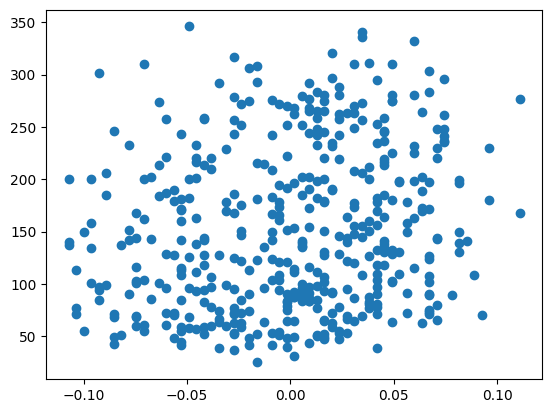

1


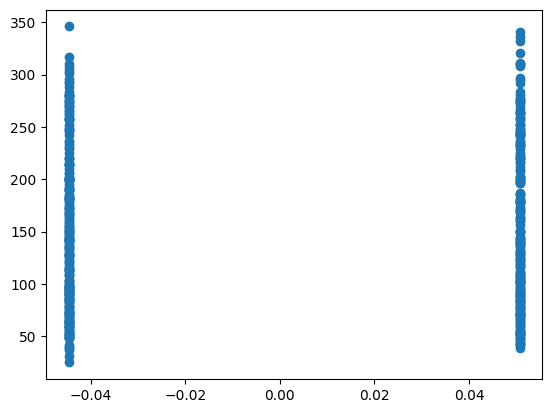

2


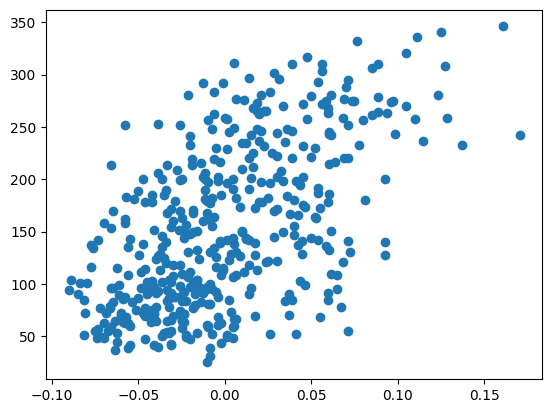

3


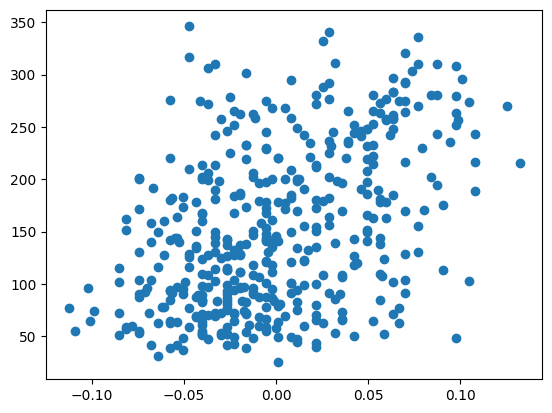

4


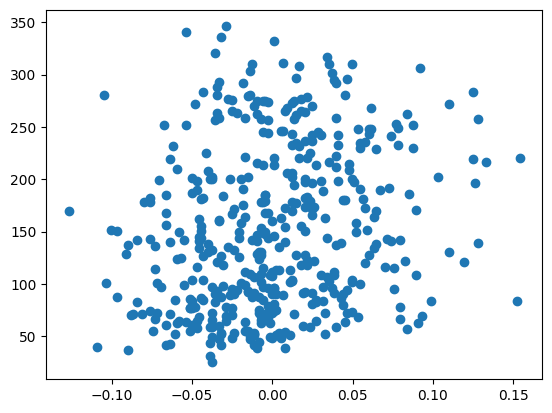

5


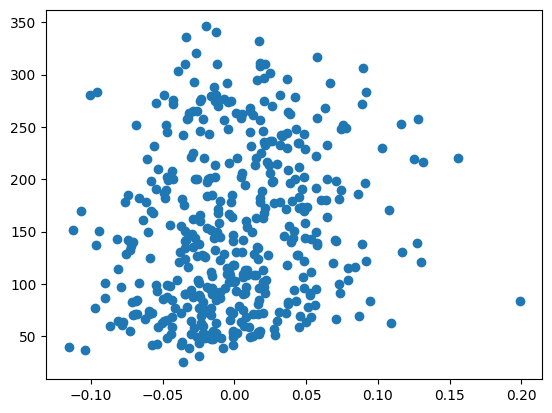

6


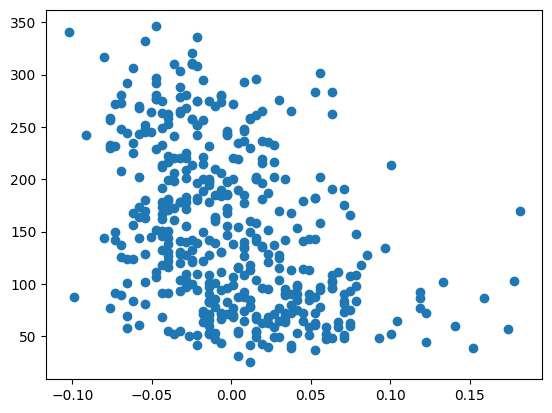

7


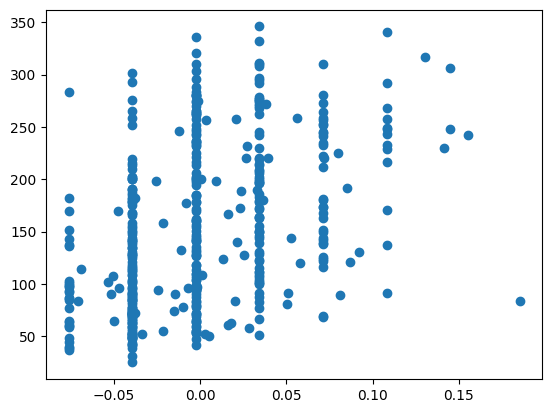

8


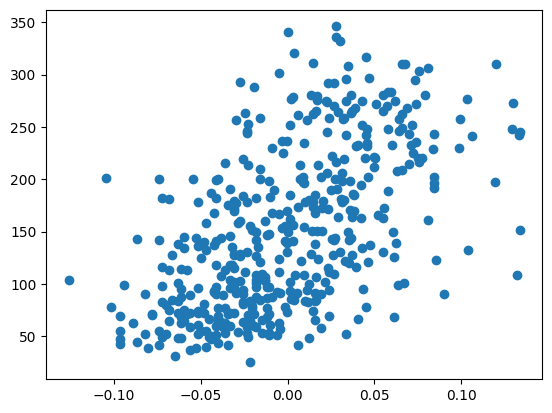

9


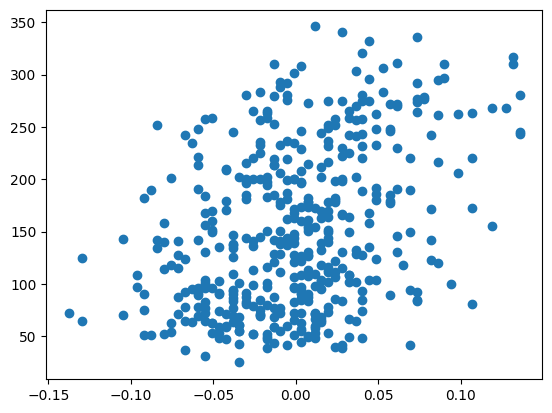

In [19]:
for i in range(X.shape[1]):
  print(i)
  plt.scatter(X[:,i], y)
  plt.show()

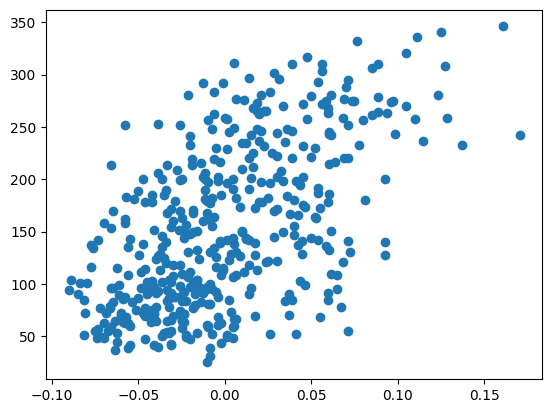

In [21]:
X2 = X[:,2:3]
plt.scatter(X2, y)
plt.show()

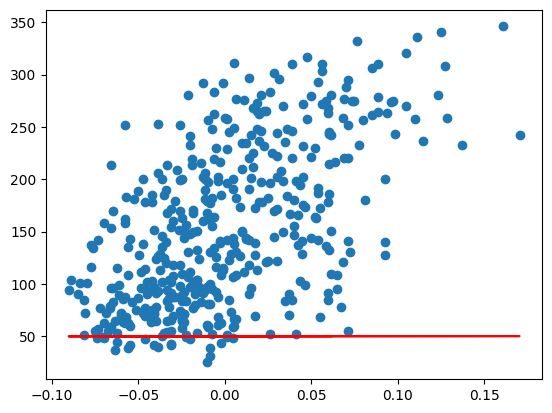

In [30]:
def modelo_linear(X, a, b):
  y = a*X + b
  return y

ypred = modelo_linear(X2, 1, 50)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

In [32]:
def mae(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yAbs = abs(yDiff)
  errorSum = sum(yAbs)
  mae = errorSum/len(yAbs)
  return mae

ypred = modelo_linear(X2, 1, 50)
mae(y, ypred)

array([102.79093221])

In [33]:
def mse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return mse

ypred = modelo_linear(X2, 1, 50)
mse(y, ypred)


array([16356.83965946])

In [35]:
from math import sqrt
def rmse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare = yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return sqrt(mse)

ypred = modelo_linear(X2, 1, 50)
rmse(y, ypred)

127.8938609138659

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y, ypred):
  mse = mean_squared_error(y,ypred)
  return sqrt(mse)

ypred = modelo_linear(X2, 1, 50)
rmse(y, ypred)

127.89386091386591

170.51240981363347


<ipython-input-46-147424628e6c>:13: RuntimeWarning: overflow encountered in divide
  ajusteA = sum([erro[i]*X[i] for i in range(X.shape[0])])/sum(X)
<ipython-input-46-147424628e6c>:11: RuntimeWarning: invalid value encountered in add
  ajusteB = (sum(erro)/len(erro))


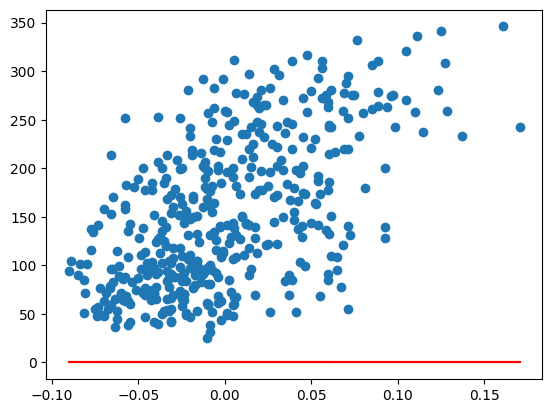

In [46]:
from sklearn.metrics import mean_squared_error
class regressao_linear():
  def __init__(self):
    self.a = 0
    self.b = 0

  def fit(self, X, y):
    for _ in range(500):
      ypred = self.predict(X)
      erro = ypred - y.reshape(-1,1)
      ajusteB = (sum(erro)/len(erro))
      self.b = self.b - 0.1*ajusteB[0]
      ajusteA = sum([erro[i]*X[i] for i in range(X.shape[0])])/sum(X)
      self.a = self.a - 0.1*ajusteA[0]

  def predict(self, X):
    y = self.a*X + self.b
    return y

plt.scatter(X2, y)
modelo = regressao_linear()
ypred = modelo.predict(X2)
print(rmse(y,ypred))
plt.plot(X2, ypred, 'r')

modelo.fit(X2, y)

ypred = modelo.predict(X2)
plt.scatter(X2,y)
plt.plot(X2, ypred, 'g')
plt.show()

Exercício usando o LinearRegression do sklearn

3890.456585461273
152.13348416289617 [949.43526038]


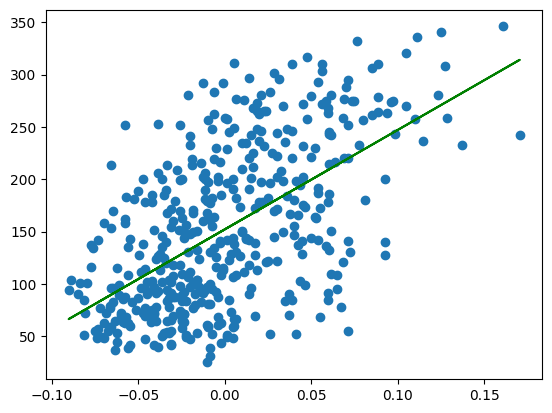

In [49]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(mean_squared_error(y,ypred))
print(modelo.intercept_, modelo.coef_)
plt.scatter(X2,y)
plt.plot(X2, ypred, 'g')
plt.show()